In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from mpl_toolkits.mplot3d import Axes3D
from pulp import *

**1) Sea el problema de minimización**

$$f_1(x)=(x-50)^2, \quad f_2(x)=(x+50)^2, \quad -64\leq x\leq 64$$

**Hallar soluciones dominadas y no dominadas.**

Para hallar las soluciones dominadas y no dominadas usaremos un análisis de monotonía para las funciones, primero encontremos los puntos críticos de ambas:

$$f_1'(x)=0 \iff 2(x-50)=0 \iff x=50$$
$$f_2'(x)=0 \iff 2(x+50)=0 \iff x=-50$$

Como ambas derivadas son continuas en el intervalo dado, los únicos puntos críticos son $x=50$ para $f_1$ y $x=-50$ para $f_2$. Note que $f_1'(x)<0$ y $f_1'(x)>0$, para $x\in [-64,50)$ y $x\in (50,64]$, respectivamente. También, $f_2'(x)<0$ y $f_2'(x)>0$, para $x\in [-64,-50)$ y $x\in (-50,64]$, respectivamente. Por tanto, $f_1$ es creciente en el intervalo $(50,64]$ y decreciente en el intervalo $[-64,50)$, análogamente, $f_2$ es decreciente en el intervalo $[-64,-50)$ y creciente en el intervalo $(-50,64]$. La monotonía de cada función en el intervalo $-64\leq x\leq 64$ se muestra en la siguiente tabla:

| Intervalo |   $f_1(x)$   |   $f_2(x)$  |
|:---------:|:------------:|:-----------:|
| [-64,-50) | Decreciente  | Decreciente |
| (-50,50)  | Decreciente  |  Creciente  |
| (50,64]   |  Creciente   |  Creciente  |

Así, $x=50$ y $x=-50$ son mínimos relativos para $f_1$ y $f_2$, respectivamente. De hecho, son mínimos absolutos en el intervalo $-64\leq x\leq 64$ para cada función. Teniendo en cuenta este análisis previo de monotonía para ambas funciones, podemos establecer algunas conclusiones sobre las soluciones dominadas y no dominadas en este problema de minimización:
* Las soluciones dominadas se encuentran en el intervalo $[-64,-50)\cup (50,64]$, puesto que $f_1(50)\leq f_1(x)$ y $f_2(-50)\leq f_2(x)$, para $x\in [-64,-50)\cup (50,64]$.
* Las soluciones no dominadas se encuentran en el intervalo $[-50,50]$ puesto que las soluciones en el intervalo $(-50,50)$ no son comparables en la relación de dominancia y $x=\pm50$ son los mínimos absolutos de cada función.

Lo anterior lo podemos notar en la siguiente gráfica:

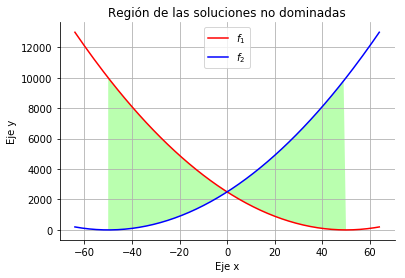

In [6]:
x=np.arange(-64,65)
def f_1(x):
    return (x-50)**2
def f_2(x):
    return (x+50)**2
F_1=f_1(x)
F_2=f_2(x)
def pol(rx,ry,k):
    ax = plt.gca()
    verts=[]
    for i in range(rx,ry):
        verts.append([i,f_1(i)])
    while k>=rx:
        verts.append([k,f_2(k)])
        k=k-1
    poly = Polygon(verts, facecolor='#8cff7a',alpha=0.6)
    ax.add_patch(poly)
def g(labely,labelx,label1,label2,color1,color2,title,rx1,ry1,k1,rx2,ry2,k2):
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_ylabel(labely)
    ax.set_xlabel(labelx)
    ax.set_title(title)
    plt.grid(True)
    plt.plot(x,F_1,color=color1,label=label1)
    plt.plot(x,F_2,color=color2,label=label2)
    ax.legend()
    pol(rx1,ry1,k1)
    pol(rx2,ry2,k2)
    plt.show()
g('Eje y','Eje x','$f_1$','$f_2$','red','blue','Región de las soluciones no dominadas',-50,1,-1,0,51,49)

** 2) Encontrar las soluciones de pareto para el problema **

$$f_1(x_1,x_2)=1-e^{-(x_1-1)^2-(x_2+1)^2}$$
$$f_2(x_1,x_2)=1-e^{-(x_1+1)^2-(x_2-1)^2}$$

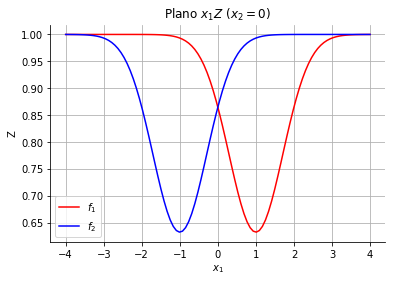

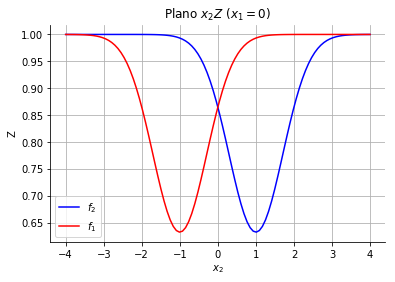

In [8]:
x=np.linspace(-4,4,100)
def f_1(x):
    return 1-np.exp(-(x-1)**2-1)
def f_2(x):
    return 1-np.exp(-(x+1)**2-1)
F_1=f_1(x)
F_2=f_2(x)
g('Z','$x_1$','$f_1$','$f_2$','red','blue','Plano $x_1Z \ (x_2=0)$',0,0,0,0,0,0)
g('Z','$x_2$','$f_2$','$f_1$','blue','red','Plano $x_2Z \ (x_1=0)$',0,0,0,0,0,0)

In [3]:
def f_1(x):
    return 1-np.exp(-(x[0]-1)**2-(x[1]+1)**2)
def f_2(x):
    return 1-np.exp(-(x[0]+1)**2-(x[1]-1)**2)
vec=[]
for i in np.arange(-2,3):
    for j in np.arange(-2,3):
        vec.append([i,j])
F_1=[]
F_2=[]
for i in range(len(vec)):
    F_1.append(f_1(vec[i]))
    F_2.append(f_2(vec[i]))

In [14]:
def Dom(vec,F_1,F_2):
    Dominada=[]
    No_Dominada=[]
    for i in range(len(vec)):
        j=0
        d=0
        while (j<len(vec) and j!=i) and d==0:
            if vec[i] in Dominada:
                d=1
            else:
                if (F_1[i]<=F_1[j] and F_2[i]<F_2[j]) or (F_1[i]<F_1[j] and F_2[i]<=F_2[j]):
                    if vec[j] not in Dominada:
                        Dominada.append(vec[j])
                    if vec[j] in No_Dominada:
                        No_Dominada.remove(vec[j])
                    if vec[i] not in No_Dominada:
                        No_Dominada.append(vec[i])
                if (F_1[i]>=F_1[j] and F_2[i]>F_2[j]) or (F_1[i]>F_1[j] and F_2[i]>=F_2[j]):
                    if vec[i] not in Dominada:
                        Dominada.append(vec[i])
                    if vec[i] in No_Dominada:
                        No_Dominada.remove(vec[i])
                    if (vec[j] not in No_Dominada) and (vec[j] not in Dominada):
                        No_Dominada.append(vec[j])
                    d=1    
                if ((F_1[i]>=F_1[j] and F_2[i]<F_2[j]) or (F_1[i]>F_1[j] and F_2[i]<=F_2[j])) or ((F_1[i]<=F_1[j] and F_2[i]>F_2[j]) or (F_1[i]<F_1[j] and F_2[i]>=F_2[j])): 
                    if (vec[j] not in No_Dominada) and (vec[j] not in Dominada):
                        No_Dominada.append(vec[j])
                    if (vec[i] not in No_Dominada) and (vec[i] not in Dominada):
                        No_Dominada.append(vec[i])
            j=j+1
    print('Las soluciones de pareto son:')
    if np.array(No_Dominada).shape[1]==2:
        for i in No_Dominada:
            print('('+str(i[0])+','+str(i[1])+')')
    else:
        for i in No_Dominada:
            print('('+str(i[0])+','+str(i[1])+','+str(i[2])+')')
Dom(vec,F_1,F_2)

Las soluciones de pareto son:
(-1,0)
(-1,1)
(0,-1)
(0,0)
(0,1)
(1,-1)
(1,0)


** 3) Una agencia de publicidad con 100 empleados; ha recibido un contrato para promover un producto nuevo. La agencia puede anunciarlo por radio y por TV. La tabla siguiente contiene datos sobre la cantidad de personas a las que llega cada tipo de anuncio y sus requisitos de costo y mano de obra.**

|                                  | Datos/min | anuncio |
| :------------------------------: | :-------: | :----:  |
|                                  | **Radio** |  **TV** |
| **Exposición (millones person)** |     4     |     8   |
| **Costo (millones de pesos)**    |     8     |    24   |
| **Empleados asignados**          |     1     |     2   |

**El contrato prohíbe a la agencia que use más de 6 minutos en anuncios por radio.**
* **Dibujar la región de objetivos $(z_1,z_2)$.**
* **Si la mayor importancia es la maximización de la exposición y se refleja a través del problema de ponderaciones $P(3,1)$, ¿cuántos minutos de anuncios por radio y TV debe programar la agencia con el propósito de maximizar las exposiciones y minimizar el costo de presupuesto?**
* **Usar el método de $\epsilon$ restricciones para generar soluciones no dominadas.**

Sean $x_1, x_2$ los minutos asignados a los anuncios de radio y TV, respectivamente. La fórmulación de la situación anterior como un problema de programación lineal sería:

$$\begin{aligned}&\text{Max} \ z_1=4x_1+8x_2\\ &\text{Min} \ z_2=8x_1+24x_2\\ \\&\text{S.A.}\\ &x_1+2x_2\leq 100\\ &x_1\leq 6\\ &x_i\geq 0, \ i\in\{1,2\} \end{aligned}$$

Observemos ahora como sería la región de objetivos para $z_1$ y $z_2$:

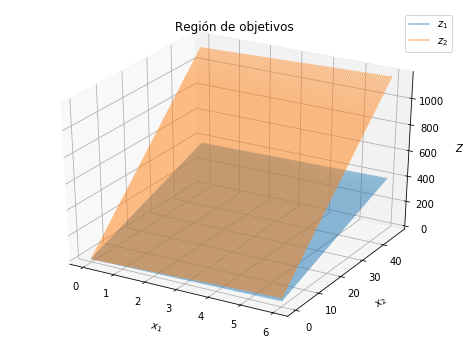

In [43]:
def plot(c1,c2,c3,c4,l1,l2,p,puntos,puntos_x,puntos_y):
    def z_1(Array):
        return c1*Array[0]+c2*Array[1]
    def z_2(Array):
        return c3*Array[0]+c4*Array[1]
    if p==0:
        x_1=np.linspace(0,l1,100)
        x_2=np.linspace(0,l2,100)
        Z=[]
        for i in x_1:
            for j in x_2:
                Z.append([i,j])
        Z=np.array(Z)
        Z_1=np.zeros(Z.shape[0])
        Z_2=np.zeros(Z.shape[0])
        X_1=np.zeros(Z.shape[0])
        X_2=np.zeros(Z.shape[0])
        for i in range(Z.shape[0]):
            Z_1[i]=z_1(Z[i])
            Z_2[i]=z_2(Z[i])
        k=0
        for i in x_1:
            for j in x_2:
                X_1[k]=i
                X_2[k]=j
                k=k+1
    else:
        Z=puntos
        Z_1=np.zeros(Z.shape[0])
        Z_2=np.zeros(Z.shape[0])
        for i in range(Z.shape[0]):
            Z_1[i]=z_1(Z[i])
            Z_2[i]=z_2(Z[i])
        X_1=puntos_x
        X_2=puntos_y
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title('Región de objetivos')
    ax.set_xlabel('$x_1$', labelpad=10)
    ax.set_ylabel('$x_2$', labelpad=10)
    ax.set_zlabel('$Z$', labelpad=10)
    ax.plot(X_1,X_2,Z_1,label='$z_1$',alpha=0.5)
    ax.plot(X_1,X_2,Z_2,label='$z_2$',alpha=0.5)
    ax.legend()
    plt.show()
plot(4,8,8,24,6,47,0,0,0,0)

Considerando el método de las ponderaciones, el problema anterior se transforma en un problema mono-objetivo haciendo $Z=3z_1-z_2=12x_1+24x_2-8x_1-24x_2=4x_1$, así:

$$\begin{aligned}&\text{Max} \ Z=4x_1\\ \\&\text{S.A.}\\ &x_1+2x_2\leq 100\\ &x_1\leq 6\\ &x_i\geq 0, \ i\in\{1,2\} \end{aligned}$$

Cuya solución trivial es $x_1=6$ y $x_2=0$ para un $Z=24$, es decir, $z_1=24$ y $z_2=48$. Considerando ahora el método de $\epsilon$ restricciones, el problema anterior se transforma en un problema mono-objetivo haciendo $z_2$ una restricción, así:

$$\begin{aligned}&\text{Max} \ z_1=4x_1+8x_2\\ \\&\text{S.A.}\\ &8x_1+24x_2\leq 100\\ &x_1+2x_2\leq 100\\ &x_1\leq 6\\ &x_i\geq 0, \ i\in\{1,2\} \end{aligned}$$

Resolvemos entonces el problema:

In [4]:
LP= pulp.LpProblem("LP", pulp.LpMaximize)
x1 = pulp.LpVariable('x1', lowBound=0, cat='Continuous')
x2 = pulp.LpVariable('x2', lowBound=0, cat='Continuous')
LP += 4 * x1+8*x2, "z1"
LP += x1 <= 6
LP += x1+2*x2 <= 100
LP += 8*x1+24*x2 <= 100
LP.solve()
pulp.LpStatus[LP.status]
for variable in LP.variables():
    print("{} = {}".format(variable.name, variable.varValue))
print('z1 = '+str(pulp.value(LP.objective)))

x1 = 6.0
x2 = 2.1666667
z1 = 41.3333336


Cuya solución es $x_1=6$, $x_2=2.17$ para un $z_1=41.34$ y $z_2=100$.

**4) Sea el problema de optimización:**

$$\begin{aligned} &\text{Max} \ z_1=3x_1+2x_2^2 \\ &\text{Min} \ z_2=-x_1+x_2^2 \\ \\ &\text{S.A.}\\ &2x_1+x_2\leq 24\\ &-x_1+2x_2\leq 16\\ &2x_1+4x_2\leq 48\\ &x_i\geq 0, \ i\in \{1,2\}\end{aligned}$$

Usemos el método de los pesos para resolver este problema multiobjetivo. Consideremos $Z=z_1-2z_2=3x_1+2x_2^2+2x_1-2x_2^2=5x_1$, así:

$$\begin{aligned} &\text{Max} \ Z=5x_1\\ \\ &\text{S.A.}\\ &2x_1+x_2\leq 24\\ &-x_1+2x_2\leq 16\\ &2x_1+4x_2\leq 48\\ &x_i\geq 0, \ i\in \{1,2\} \end{aligned}$$

Resolvemos entonces el problema:

In [5]:
LP= pulp.LpProblem("LP", pulp.LpMaximize)
x1 = pulp.LpVariable('x1', lowBound=0, cat='Continuous')
x2 = pulp.LpVariable('x2', lowBound=0, cat='Continuous')
LP += 5 * x1, "Z"
LP += 2*x1+x2 <= 24
LP += -x1+2*x2 <= 16
LP += 2*x1+4*x2 <= 48
LP.solve()
pulp.LpStatus[LP.status]
for variable in LP.variables():
    print("{} = {}".format(variable.name, variable.varValue))
print('Z = '+str(pulp.value(LP.objective)))

x1 = 12.0
x2 = 0.0
Z = 60.0


Cuya solución es $x_1=12$, $x_2=0$ para un $Z=60$, es decir, $z_1=36$ y $z_2=-12$.

** 5) En el problema de cartera se tiene:** $E(R_1)=10\%$, $E(R_2)=15\%$, $Var(R_1)=0.0009$, $Var(R_2)=0.064$. **Resolver las siguientes cuestiones**:
* **Dibujar la región factible.**

La fórmulación de la situación anterior como un problema de programación multiobjetivo sería:

$$\begin{aligned}&\text{Max} \ z_1=E(R(x))=0.1x_1+0.15x_2\\ &\text{Max} \ z_2=Var(R(x))=0.0009x_1+0.064x_2\\ \\&\text{S.A.}\\ &x_1+x_2\leq 1\\ &x_i\geq 0, \ i\in\{1,2\} \end{aligned}$$

Observemos ahora como sería la región de objetivos para $z_1$ y $z_2$:

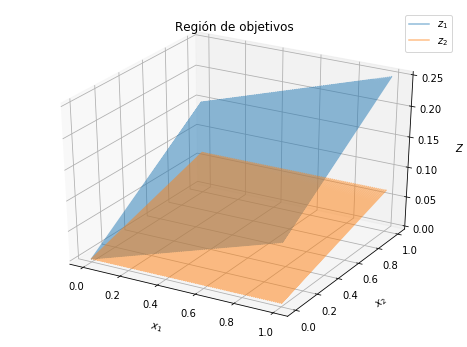

In [41]:
plot(0.1,0.15,0.0009,0.064,1,1,0,0,0,0)

* **Aproximar la región objetivo** $z_1,z_2$. **Tome los siguientes puntos:**

| **Puntos** | $(x_1,x_2)$ |
| ---------- | ----------- |
|      0     |    (0,0)    |
|      A     |    (5,0)    |
|      B     |    (1,0)    |
|      C     |  (0.5,0.5)  |
|      D     |    (0,1)    |
|      E     |    (0,5)    |

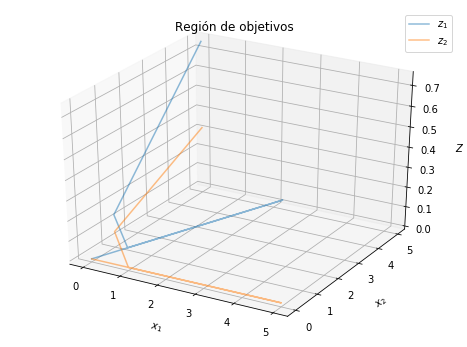

In [44]:
puntos=np.array([[0,0],[5,0],[1,0],[0.5,0.5],[0,1],[0,5]])
puntos_x=[0,5,1,0.5,0,0]
puntos_y=[0,0,0,0.5,1,5]
plot(0.1,0.15,0.0009,0.064,1,1,1,puntos,puntos_x,puntos_y)

* **Suponga que el objetivo** $z_1$ **es doblemente importante que el objetivo $z_2$.**

Bajo la suposición anterior se tiene que $Z=2z_1+z_2=0.2x_1+0.3x_2+0.0009x_1+0.064x_2$, así

$$\begin{aligned}&\text{Max} \ Z=0.2009x_1+0.364x_2\\ \\&\text{S.A.}\\ &x_1+x_2\leq 1\\ &x_i\geq 0, \ i\in\{1,2\} \end{aligned}$$

Resolvamos entonces el problema:

In [45]:
LP= pulp.LpProblem("LP", pulp.LpMaximize)
x1 = pulp.LpVariable('x1', lowBound=0, cat='Continuous')
x2 = pulp.LpVariable('x2', lowBound=0, cat='Continuous')
LP += 0.2009*x1+0.364*x2, "Z"
LP += x1+x2<=1
LP.solve()
pulp.LpStatus[LP.status]
for variable in LP.variables():
    print("{} = {}".format(variable.name, variable.varValue))
print('Z = '+str(pulp.value(LP.objective)))

x1 = 0.0
x2 = 1.0
Z = 0.364


Cuya solución es $x_1=0$ y $x_2=1$ para un $Z=0.364$, es decir, $z_1=0.15$ y $z_2=0.064$.

* **Si ahora se considera más importante el objetivo $z_1$ y se toma como meta para el segundo objetivo el valor** $\epsilon_2=30$.

Considerando ahora el método de $\epsilon$-restricciones, tenemos:

$$\begin{aligned}&\text{Max} \ z_1=0.1x_1+0.15x_2\\ \\&\text{S.A.}\\ &0.0009x_1+0.064x_2\leq 30\\ &x_1+x_2\leq 1\\ &x_i\geq 0, \ i\in\{1,2\} \end{aligned}$$

Resolvamos entonces el problema:

In [47]:
LP= pulp.LpProblem("LP", pulp.LpMaximize)
x1 = pulp.LpVariable('x1', lowBound=0, cat='Continuous')
x2 = pulp.LpVariable('x2', lowBound=0, cat='Continuous')
LP += 0.1*x1+0.15*x2, "z1"
LP += 0.0009*x1+0.064*x2<=30
LP += x1+x2<=1
LP.solve()
pulp.LpStatus[LP.status]
for variable in LP.variables():
    print("{} = {}".format(variable.name, variable.varValue))
print('z1 = '+str(pulp.value(LP.objective)))

x1 = 0.0
x2 = 1.0
z1 = 0.15


Cuya solución es $x_1=0$ y $x_2=1$, para $z_1=0.15$ y $z_2=0.064$.

* **Asuma que** $\rho_{12}=0.73$**, coeficiente de correlación entre el rendimiento 1 y el rendimiento 2. Responder el inciso anterior.**

**6) El problema siguiente es propuesto por Zitzler: considere** $f(x)=(f_1(x),f_2(x)), \ x\in \mathbb{R}^n$**, donde** $f_1(x)=x_1$**,** $f_2(x)=g(x)h(f_1(x),g(x))$ y $\displaystyle g(x)=1+\frac{1}{n-1}\sum_{i=2}^nx_i$**,** $\displaystyle h(f_1(x),g(x))=1-\sqrt{\frac{f_1(x)}{g(x)}}$**. Asuma que** $n=3$ **y** $x_i=[0,1]$**. Encontrar las soluciones de Pareto.**

In [15]:
def f(Array):
    g=1+(np.sum(Array[1:3])/2)
    h=1-np.sqrt(Array[0]/g)
    f_2=g*h
    return Array[0],f_2
x_1=np.linspace(0,1,10)
x_2=np.linspace(0,1,10)
x_3=np.linspace(0,1,10)
vec=[]
for i in x_1:
    for j in x_2:
        for k in x_3:
            vec.append([i,j,k])
F_1=[]
F_2=[]
for i in vec:
    F_1.append(f(i)[0])
    F_2.append(f(i)[1])
Dom(vec,F_1,F_2)

Las soluciones de pareto son:
(0.0,0.0,0.0)
(0.1111111111111111,0.0,0.0)
(0.2222222222222222,0.0,0.0)
(0.3333333333333333,0.0,0.0)
(0.4444444444444444,0.0,0.0)
(0.5555555555555556,0.0,0.0)
(0.6666666666666666,0.0,0.0)
(0.7777777777777777,0.0,0.0)
(0.8888888888888888,0.0,0.0)
(1.0,0.0,0.0)


**7) Presentar un breve informe sobre el AHP Fuzzy.**